In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv("E:\Drive E (Credential)\StatSkew- Internship\Machine Learning- Week 4\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [3]:
!pip install fast_ml

     -------------------------------------- 42.1/42.1 kB 338.6 kB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fast_ml.outlier_treatment import OutlierTreatment
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [8]:
df['Month']=df['Month'].map({'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [9]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [10]:
df['VisitorType']=df['VisitorType'].map({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})

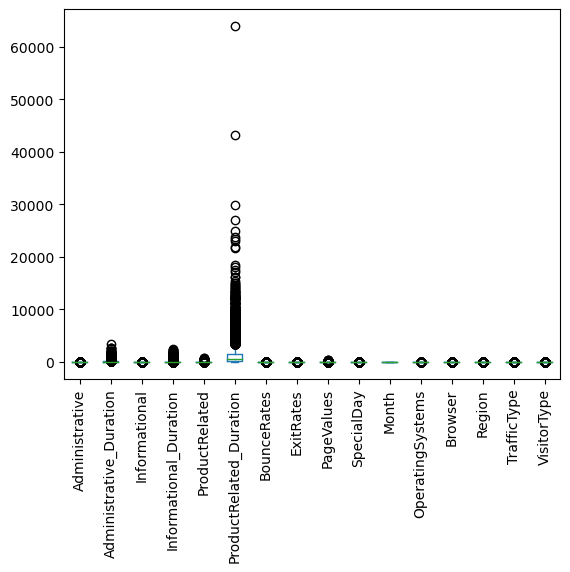

<Figure size 1200x1200 with 0 Axes>

In [11]:
df.plot(kind='box')
plt.xticks(rotation=90)
plt.figure(figsize=(12,12))
plt.show()

<AxesSubplot:>

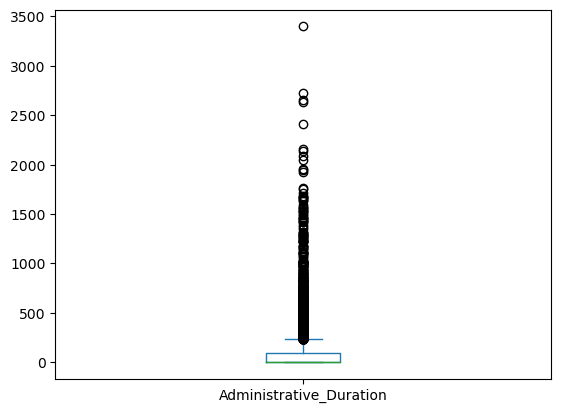

In [12]:
df['Administrative_Duration'].plot(kind='box')

<AxesSubplot:>

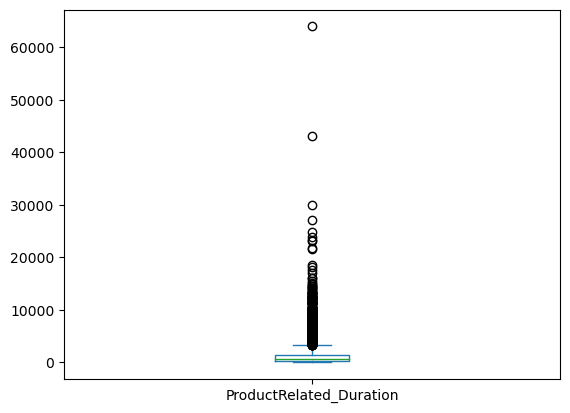

In [13]:
df['ProductRelated_Duration'].plot(kind='box')

<AxesSubplot:>

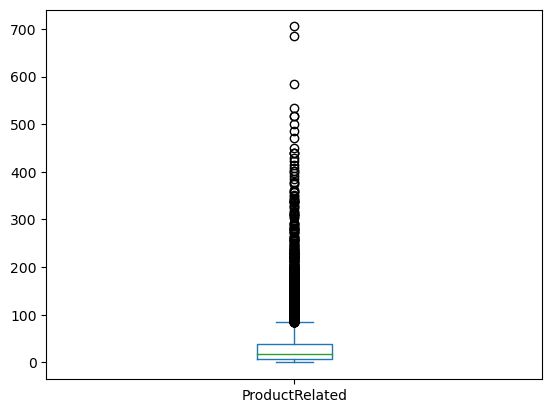

In [14]:
df['ProductRelated'].plot(kind='box')

In [15]:
ot = OutlierTreatment()
ot.fit(df,['Administrative_Duration','ProductRelated_Duration','ProductRelated'])
new_data = ot.transform(df)

<AxesSubplot:>

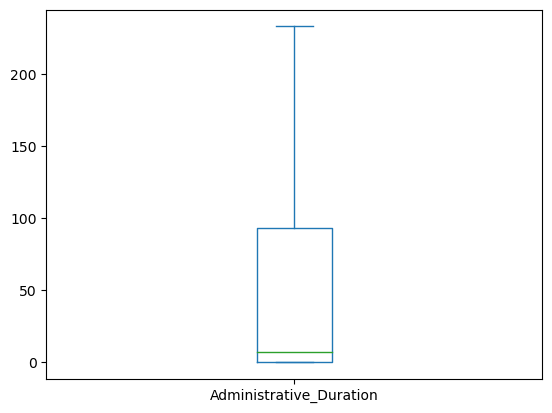

In [16]:
df['Administrative_Duration'].plot(kind='box')

<AxesSubplot:>

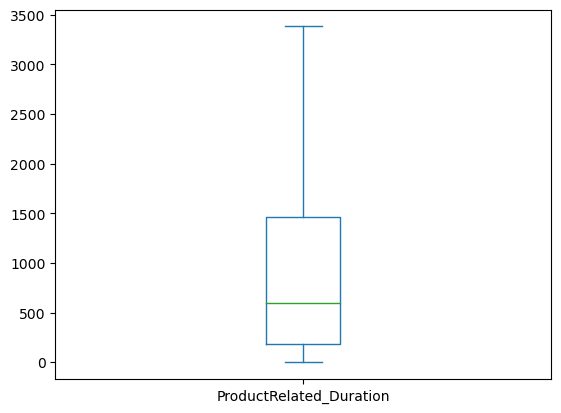

In [17]:
df['ProductRelated_Duration'].plot(kind='box')

<AxesSubplot:>

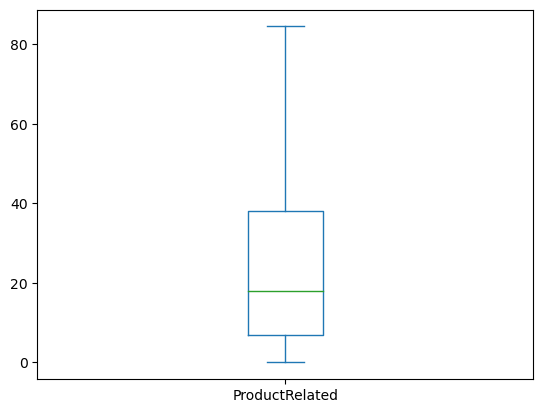

In [18]:
df['ProductRelated'].plot(kind='box')

In [19]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,56.972776,0.503569,34.472398,26.696229,989.691454,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.151176
std,3.321784,79.250727,1.270156,140.749294,25.155967,1033.120180,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,233.140625,24.000000,2549.375000,84.500000,3384.186784,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000


<AxesSubplot:>

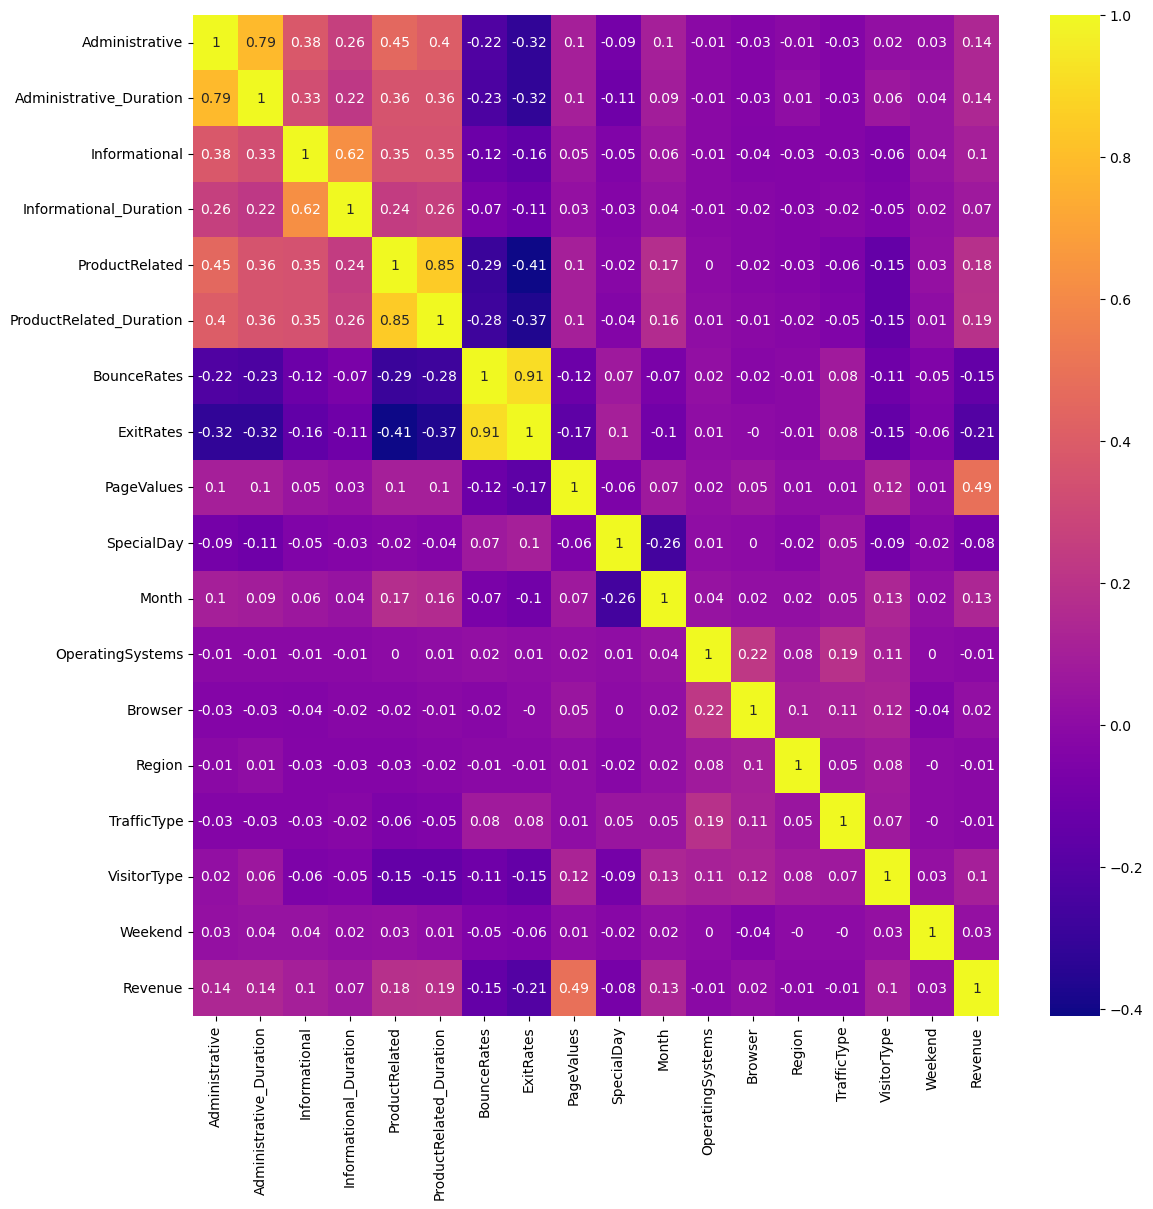

In [20]:
correlation = df.corr().round(2)
plt.figure(figsize=(13,13))
sns.heatmap(correlation,cmap='plasma',annot=True)

In [22]:
df['Weekend']=df['Weekend'].map({False: 1,True: 0})
df['Revenue']=df['Revenue'].map({False: 0,True: 1})

In [23]:
x1 = df.drop('Revenue',axis=1)
y1 = df['Revenue']

In [24]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                    float64
Revenue                    float64
dtype: object

In [25]:
x1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,NaN
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,NaN
2,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,NaN
3,0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,NaN
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,0,NaN
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,0,NaN
12327,0,0.0,0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,0,NaN
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,0,NaN


In [26]:
y1

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12325   NaN
12326   NaN
12327   NaN
12328   NaN
12329   NaN
Name: Revenue, Length: 12330, dtype: float64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=0)

In [28]:
x_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
11332,1,7.125000,6,1043.928571,73.0,3384.186784,0.008175,0.024452,0.000000,0.0,11,3,2,5,2,0,NaN
12071,0,0.000000,0,0.000000,12.0,157.000000,0.008333,0.033333,0.000000,0.0,11,3,2,7,1,0,NaN
10023,0,0.000000,0,0.000000,37.0,638.250000,0.005556,0.016667,0.000000,0.0,11,2,2,4,1,0,NaN
6771,9,233.140625,0,0.000000,17.0,200.950000,0.000000,0.024603,0.000000,0.0,9,2,2,1,2,0,NaN
4283,0,0.000000,1,6.000000,13.0,2782.750000,0.000000,0.005128,0.000000,0.4,5,2,2,9,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,4.000000,0,0.000000,50.0,549.916667,0.000000,0.008163,0.000000,0.0,5,4,1,1,4,0,NaN
3264,0,0.000000,0,0.000000,5.0,691.000000,0.000000,0.080000,0.000000,0.6,5,2,2,2,3,0,NaN
9845,13,233.140625,5,128.000000,84.5,3384.186784,0.001905,0.013669,3.651726,0.0,11,2,2,3,10,0,NaN
10799,0,0.000000,0,0.000000,23.0,338.583333,0.000000,0.008696,0.000000,0.0,11,3,2,1,10,0,NaN


In [29]:
x_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
12245,0,0.000000,0,0.00,74.0,3109.404167,0.009459,0.042859,0.000000,0.0,11,2,2,1,2,0,NaN
9704,16,180.666667,1,649.25,84.5,3384.186784,0.007937,0.026808,0.000000,0.0,12,2,6,7,1,0,NaN
9177,9,186.673077,0,0.00,73.0,1606.308250,0.010295,0.019109,0.000000,0.0,11,3,2,8,2,0,NaN
8848,0,0.000000,0,0.00,2.0,0.000000,0.200000,0.200000,0.000000,0.0,11,3,2,5,20,0,NaN
2768,0,0.000000,0,0.00,1.0,0.000000,0.200000,0.200000,0.000000,1.0,5,4,1,2,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,0,0.000000,0,0.00,5.0,0.000000,0.200000,0.200000,0.000000,0.0,5,3,2,6,13,0,NaN
6163,1,14.200000,0,0.00,22.0,839.568189,0.000000,0.000952,60.584371,0.0,11,3,2,3,2,1,NaN
2625,5,168.000000,0,0.00,31.0,1239.083333,0.006667,0.020000,0.000000,0.0,5,3,2,6,13,0,NaN
10018,0,0.000000,0,0.00,30.0,1029.583333,0.003571,0.009167,0.000000,0.0,12,3,2,1,2,0,NaN


In [30]:
y_train

11332   NaN
12071   NaN
10023   NaN
6771    NaN
4283    NaN
         ..
4859    NaN
3264    NaN
9845    NaN
10799   NaN
2732    NaN
Name: Revenue, Length: 8631, dtype: float64

In [31]:
y_test

12245   NaN
9704    NaN
9177    NaN
8848    NaN
2768    NaN
         ..
5378    NaN
6163    NaN
2625    NaN
10018   NaN
6183    NaN
Name: Revenue, Length: 3699, dtype: float64

In [32]:
dt = DecisionTreeClassifier()

In [35]:
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
acc = accuracy_score(pred,y_test)
print(acc)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Task 2

In [36]:
import pandas as pd
from fast_ml.outlier_treatment import OutlierTreatment
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [47]:
data=pd.read_csv('baseball_players.csv')
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,0,NaN,NaN
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,0,NaN,NaN
2,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,0,NaN,NaN
3,0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,0,NaN,NaN
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,0,NaN,NaN
5,0,0.0,0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,0,NaN,NaN
6,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,0,NaN,NaN
7,1,0.0,0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,0,NaN,NaN
8,0,0.0,0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,0,NaN,NaN
9,0,0.0,0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,0,NaN,NaN


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1034 non-null   object 
 1   Team            1034 non-null   object 
 2   Position        1034 non-null   object 
 3   Height(inches)  1034 non-null   int64  
 4   Weight(pounds)  1033 non-null   float64
 5   Age             1034 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


In [49]:
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [50]:
mean1 = data['Weight(pounds)'].mean()
data['Weight(pounds)'] = data['Weight(pounds)'].fillna(mean1)
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

In [51]:
data['Weight(pounds)'] = data['Weight(pounds)'].astype(int)
data['Age'] = data['Age'].astype(int)
data.head(10)

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180,22
1,Paul_Bako,BAL,Catcher,74,215,34
2,Ramon_Hernandez,BAL,Catcher,72,210,30
3,Kevin_Millar,BAL,First_Baseman,72,210,35
4,Chris_Gomez,BAL,First_Baseman,73,188,35
5,Brian_Roberts,BAL,Second_Baseman,69,176,29
6,Miguel_Tejada,BAL,Shortstop,69,209,30
7,Melvin_Mora,BAL,Third_Baseman,71,200,35
8,Aubrey_Huff,BAL,Third_Baseman,76,231,30
9,Adam_Stern,BAL,Outfielder,71,180,27


<AxesSubplot:>

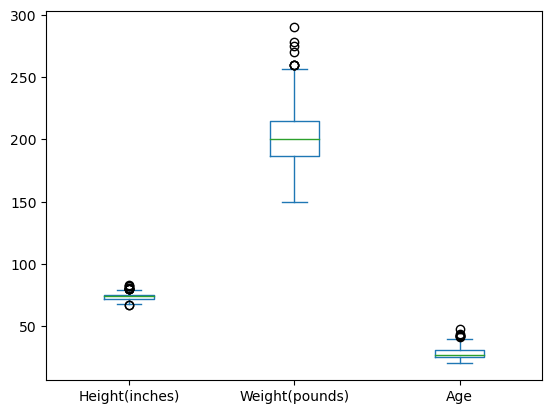

In [52]:
data.plot(kind='box')

In [53]:
ot = OutlierTreatment()

<AxesSubplot:>

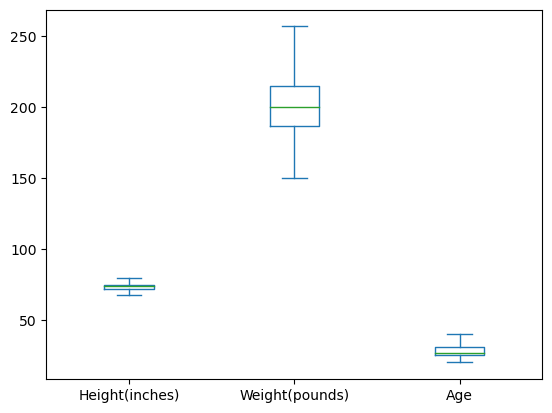

In [54]:
ot.fit(data,['Height(inches)','Weight(pounds)','Age'])
data=ot.transform(data)
data.plot(kind='box')

<AxesSubplot:xlabel='count', ylabel='Position'>

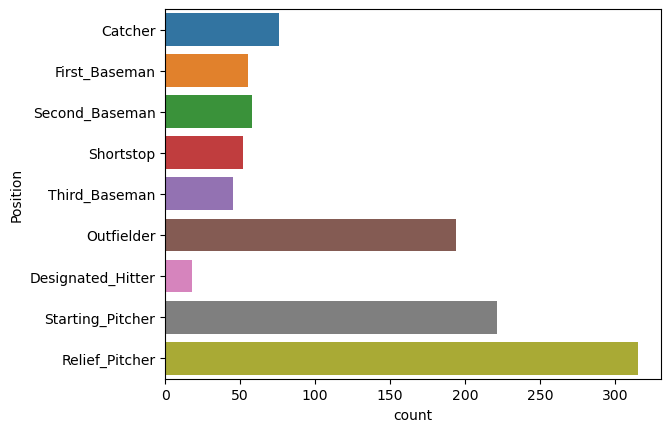

In [55]:
sns.countplot(data = data,y = 'Position')

<AxesSubplot:>

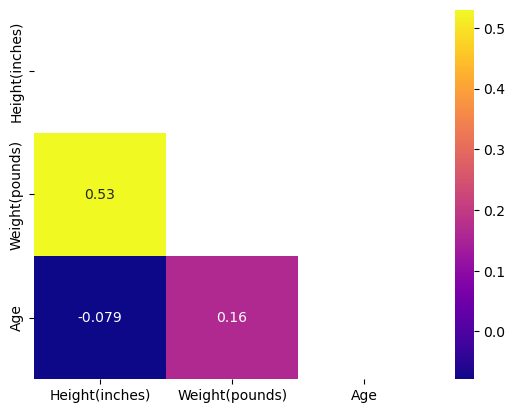

In [56]:
corr_mat = np.triu(data.corr())
sns.heatmap(data.corr(),cmap='plasma',annot=True,mask = corr_mat)

In [57]:
x = data.iloc[:,3:]
x

,Height(inches),Weight(pounds),Age
0,74.0,180.0,22.0
1,74.0,215.0,34.0
2,72.0,210.0,30.0
3,72.0,210.0,35.0
4,73.0,188.0,35.0
...,...,...,...
1029,73.0,190.0,25.0
1030,74.0,180.0,25.0
1031,75.0,205.0,25.0
1032,75.0,190.0,31.0


In [58]:
y = data.iloc[:,3:]
y

,Height(inches),Weight(pounds),Age
0,74.0,180.0,22.0
1,74.0,215.0,34.0
2,72.0,210.0,30.0
3,72.0,210.0,35.0
4,73.0,188.0,35.0
...,...,...,...
1029,73.0,190.0,25.0
1030,74.0,180.0,25.0
1031,75.0,205.0,25.0
1032,75.0,190.0,31.0


In [59]:
y1 = pd.get_dummies(y)
y1

,Height(inches),Weight(pounds),Age
0,74.0,180.0,22.0
1,74.0,215.0,34.0
2,72.0,210.0,30.0
3,72.0,210.0,35.0
4,73.0,188.0,35.0
...,...,...,...
1029,73.0,190.0,25.0
1030,74.0,180.0,25.0
1031,75.0,205.0,25.0
1032,75.0,190.0,31.0


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.2,random_state=0)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(827, 3)
(207, 3)
(827, 3)
(207, 3)


In [62]:
lr = LinearRegression()

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
pred = lr.predict(x_test)
pred

array([[ 73. , 195. ,  30. ],
       [ 70. , 190. ,  23. ],
       [ 73. , 200. ,  26. ],
       [ 74. , 190. ,  26. ],
       [ 77. , 240. ,  30. ],
       [ 75. , 156. ,  27. ],
       [ 76. , 170. ,  24. ],
       [ 76. , 195. ,  25. ],
       [ 75. , 220. ,  28. ],
       [ 70. , 165. ,  29. ],
       [ 70. , 180. ,  23. ],
       [ 74. , 215. ,  34. ],
       [ 74. , 200. ,  32. ],
       [ 71. , 185. ,  25. ],
       [ 74. , 200. ,  26. ],
       [ 72. , 195. ,  24. ],
       [ 78. , 223. ,  30. ],
       [ 71. , 200. ,  24. ],
       [ 74. , 190. ,  26. ],
       [ 75. , 215. ,  28. ],
       [ 77. , 203. ,  32. ],
       [ 72. , 180. ,  25. ],
       [ 79. , 240. ,  23. ],
       [ 73. , 208. ,  32. ],
       [ 74. , 180. ,  27. ],
       [ 77. , 220. ,  26. ],
       [ 75. , 185. ,  22. ],
       [ 74. , 228. ,  40. ],
       [ 77. , 210. ,  30. ],
       [ 71. , 180. ,  22. ],
       [ 73. , 191. ,  27. ],
       [ 72. , 180. ,  31. ],
       [ 72. , 190. ,  28. ],
       [ 7

In [65]:
# r2 score

In [66]:
r2 = r2_score(y_test,pred)
print(r2)

1.0


In [67]:
#mean_squared_error
mse = mean_squared_error(y_test,pred)
mse

2.261553698523465e-28

In [68]:
#Root mean squared error
rmse = np.sqrt(mse)
rmse

1.5038463014960886e-14